# Reachability Analysis
### import python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib notebook

In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-d

## <font color='red'>Section 1: Data Preprocessing </font> 

#### define column name

In [2]:
name = ['id','X','Y','Z','r','p','y','Xo','Yo','Zo','ro','s1','s2','s3']

#### get data

In [3]:
df1 = pd.read_csv('data1.csv').to_numpy()
df2 = pd.read_csv('data2.csv').to_numpy()
data = np.concatenate([df1,df2],axis=0)
data = pd.DataFrame(data[:,:-1],columns=name)
data

,id,X,Y,Z,r,p,y,Xo,Yo,Zo,ro,s1,s2,s3
0,1.0,0.067451,-0.313008,0.973136,0.0,0.0,0.0000,-0.4,0.3,0.1,0.01,0.0,1.0,1.0
1,1.0,0.067451,-0.313008,0.973136,0.0,0.0,0.0000,-0.4,0.3,0.1,0.02,0.0,1.0,1.0
2,1.0,0.067451,-0.313008,0.973136,0.0,0.0,0.0000,-0.4,0.3,0.1,0.03,0.0,1.0,1.0
3,1.0,0.067451,-0.313008,0.973136,0.0,0.0,0.0000,-0.4,0.3,0.1,0.04,0.0,1.0,1.0
4,1.0,0.067451,-0.313008,0.973136,0.0,0.0,0.0000,-0.4,0.3,0.1,0.05,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235084,75.0,0.359504,0.034103,0.032532,0.0,0.0,-1.5708,0.0,0.6,0.4,0.01,0.0,0.0,0.0
235085,75.0,0.359504,0.034103,0.032532,0.0,0.0,-1.5708,0.0,0.6,0.4,0.02,0.0,0.0,0.0
235086,75.0,0.359504,0.034103,0.032532,0.0,0.0,-1.5708,0.0,0.6,0.4,0.03,0.0,0.0,0.0
235087,75.0,0.359504,0.034103,0.032532,0.0,0.0,-1.5708,0.0,0.6,0.4,0.04,0.0,0.0,0.0


### combined data with same id

In [4]:
SCATTER_DATA = [[],[],[],[]]
features = data[['X','Y','Z']].drop_duplicates().to_numpy()
for fea in features:
    data_i = data.loc[(data['X'] == fea[0]) & (data['Y'] == fea[1])  & (data['Z'] == fea[2])]
    data_i_true = data_i.loc[(data['s1'] == 1) & (data['s2'] == 1)  & (data['s3'] == 1)]
    succ_rate = data_i_true.shape[0]/data_i.shape[0]
    for i in range(3):
        SCATTER_DATA[i].append(fea[i])
    SCATTER_DATA[-1].append(succ_rate)

## <font color='red'>Section 2: Scatter Plot </font> 

<IPython.core.display.Javascript object>


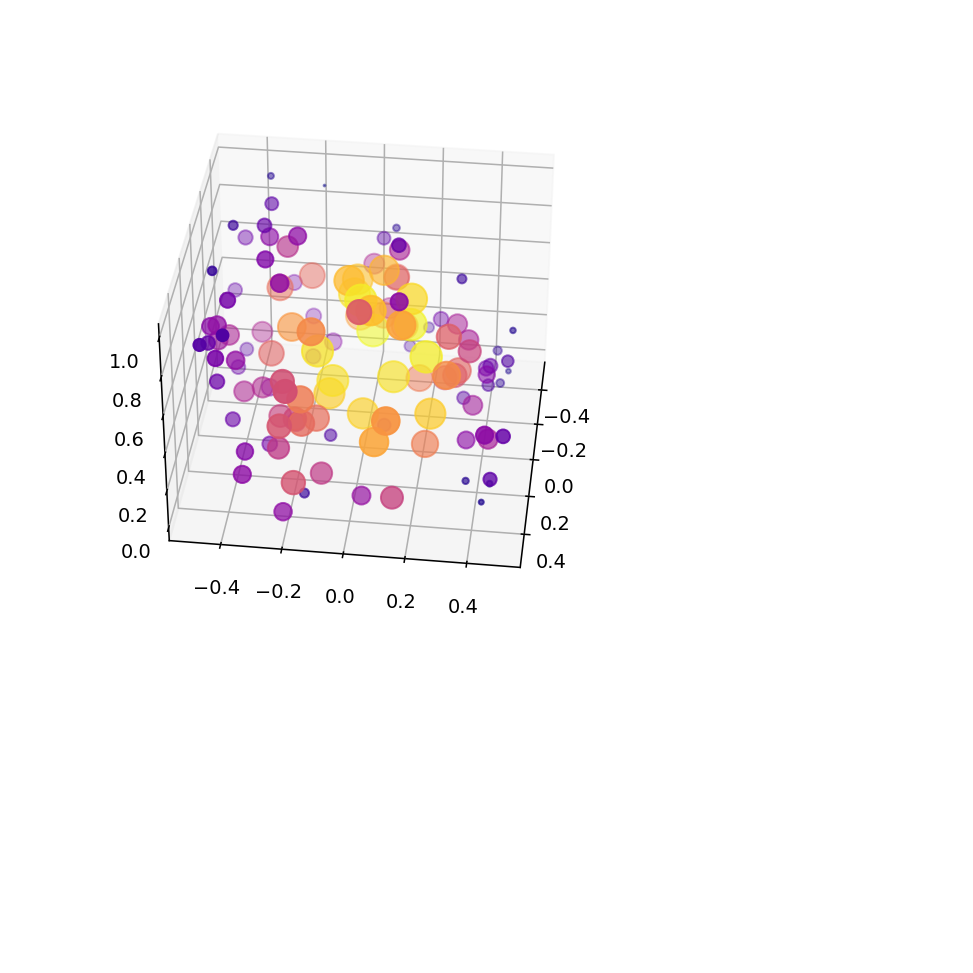

In [7]:
plt.rcParams["figure.figsize"] = (5,5)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
SCATTER_DATA = np.array(SCATTER_DATA)
ax.scatter(SCATTER_DATA[0],SCATTER_DATA[1],SCATTER_DATA[2], s=SCATTER_DATA[3]*300,c=SCATTER_DATA[3], cmap='plasma')